In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

       Feature        VIF
0          Age   2.294167
1  Current GPA  32.964533
2  Desired GPA  35.220538
3     Absences   1.499943


C:\Users\22025338\anaconda3\envs\C338\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\22025338\anaconda3\envs\C338\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\22025338\anaconda3\envs\C338\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


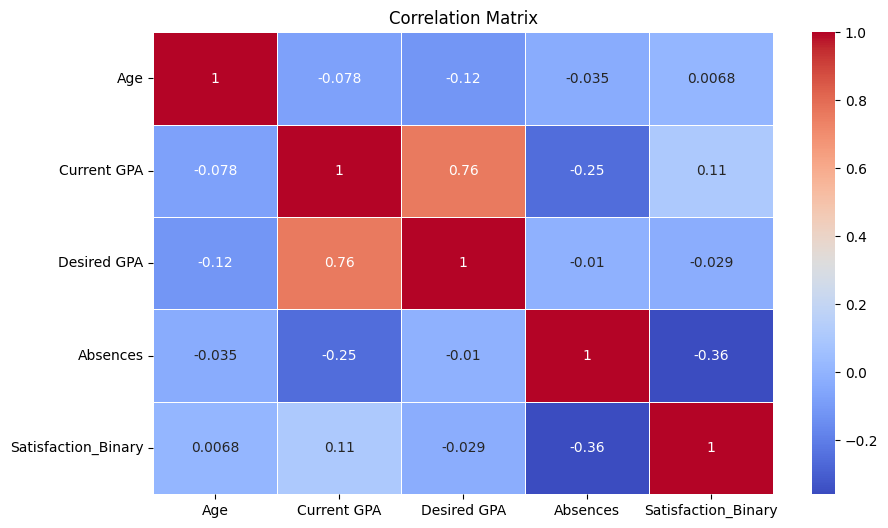

[[ 0  5]
 [ 0 46]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.90      1.00      0.95        46

    accuracy                           0.90        51
   macro avg       0.45      0.50      0.47        51
weighted avg       0.81      0.90      0.86        51



In [3]:

# Load the CSV file with the correct encoding
df = pd.read_excel("UpdatedStudentSurvey.xlsx")

# Binarize the target variable "School Satisfaction Level"
df['SatisfactionLevel'] = df['School Satisfaction Level'].apply(lambda x: 1 if x >= 4 else 0)

# Define predictor variables and target variable
X = df[['Age', 'Current GPA', 'Desired GPA', 'Absences']].dropna()
y = df['SatisfactionLevel'].loc[X.index]

# Normalize the predictor variables using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Perform logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Correlation matrix
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).assign(Satisfaction_Binary=y).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Display confusion matrix and classification report
print(conf_matrix)
print(class_report)


       Feature        VIF
0          Age   2.294167
1  Current GPA  32.964533
2  Desired GPA  35.220538
3     Absences   1.499943


C:\Users\22025338\anaconda3\envs\C338\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\22025338\anaconda3\envs\C338\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\22025338\anaconda3\envs\C338\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2202533

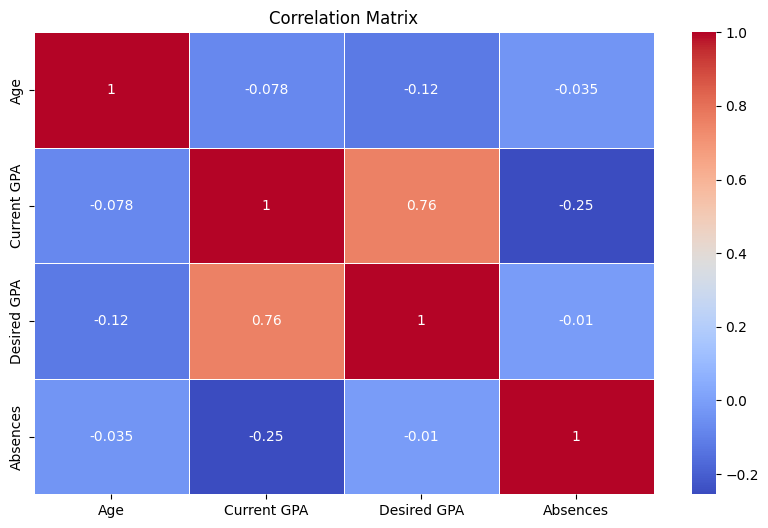

[[ 0  0 20]
 [ 0  0 11]
 [ 0  0 20]]
              precision    recall  f1-score   support

     Not yet       0.00      0.00      0.00        20
     Planned       0.00      0.00      0.00        11
   Undecided       0.39      1.00      0.56        20

    accuracy                           0.39        51
   macro avg       0.13      0.33      0.19        51
weighted avg       0.15      0.39      0.22        51



In [4]:
# Load the Excel file
df = pd.read_excel("UpdatedStudentSurvey.xlsx")

# Remove rows with missing data for the chosen features
df = df.dropna(subset=['Age', 'Current GPA', 'Desired GPA', 'Absences', 'Future Planned'])

# Define predictor variables and target variable
X = df[['Age', 'Current GPA', 'Desired GPA', 'Absences']]
y = df['Future Planned']

# Normalize the predictor variables using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Perform logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Correlation matrix
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).assign(Future_Planned=y).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Display confusion matrix and classification report
print(conf_matrix)
print(class_report)